In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils.data import *

In [2]:
key = 0

In [3]:
path = f'./data/single_key/{key}/'
dfs = get_dfs_from_midi(path, min_notes=30, min_gap=0.)

In [6]:
sample_idx = np.random.randint(len(dfs))
midi_data = df_to_midi(dfs[sample_idx])
Fs = 44100
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

# Number of notes

In [ ]:
min_length = 30
min_unique_notes = 5
dfs = [df for df in dfs if len(df) > min_length]
dfs = [df for df in dfs if df['Pitch'].nunique() > min_unique_notes]
lens = [len(df) for df in dfs]
print('Number of songs:', len(dfs))
print('Max length:', max(lens))
print('Min length:', min(lens))
print('Mean length:', np.mean(lens))
sorted_lens = sorted(lens)
plt.bar(range(len(sorted_lens)), sorted_lens, width=1.0);

In [31]:
with open(f'./data/dataframes/{key}/dfs.pkl', 'wb') as f:
    pickle.dump(dfs, f)

In [3]:
with open(f'./data/dataframes/{key}/dfs.pkl', 'rb') as f:
    dfs = pickle.load(f)

In [4]:
gap_dur_dpitch_dfs = gap_duration_deltapitch_transform(dfs)

In [9]:
dataset = GapDurationDeltaPitchDataset(gap_dur_dpitch_dfs, 30)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
len(dataset), len(dataloader)

(41394, 1294)

In [28]:
for x in dataloader:
    print(x.shape)
    y = batch_rectilinear_with_gap_transform(x)
    print(y.shape)
    break

torch.Size([32, 30, 3])
torch.Size([32, 60])
torch.Size([32, 60, 2])


In [29]:
dfs[0]

Start        End  Pitch  Velocity Instrument
0    0.000000   0.483871     60        80     melody
1    0.483871   0.967742     64        80     melody
2    0.967742   1.330645     64        80     melody
3    1.330645   1.693549     65        80     melody
4    1.693549   2.661291     67        80     melody
5    2.661291   2.903226     60        80     melody
6    2.903226   3.266129     69        80     melody
7    3.266129   3.629033     67        80     melody
8    3.629033   4.112903     65        80     melody
9    4.112903   5.806452     64        80     melody
10   5.806452   6.290323     67        80     melody
11   6.290323   6.774194     64        80     melody
12   6.774194   7.016129     62        80     melody
13   7.016129   7.137097     62        80     melody
14   7.137097   7.500001     62        80     melody
15   7.500001   7.983872     64        80     melody
16   7.983872   8.709678     62        80     melody
17   8.709678   9.677420     60        80     melody
18   9.677420  10.645162     67        80     melody
19  10.645162  11.129033     64        80     melody
20  11.129033  11.612904     62        80     melody
21  11.612904  11.975807     62        80     melody
22  11.975807  12.338711     64        80     melody
23  12.580646  13.306453     67        80     melody
24  13.306453  13.548388     64        80     melody
25  13.548388  13.790324     64        80     melody
26  13.790324  13.911291     62        80     melody
27  13.911291  14.032259     62        80     melody
28  14.032259  14.516130     62        80     melody
29  14.516130  14.879033     65        80     melody
30  14.879033  15.241937     64        80     melody
31  15.483872  15.846775     60        80     melody
32  15.846775  16.209679     60        80     melody
33  16.209679  16.451614     62        80     melody
34  16.451614  16.814517     64        80     melody
35  16.814517  17.177421     65        80     melody
36  17.177421  18.387098     67        80     melody
37  18.387098  18.750001     69        80     melody
38  18.750001  19.112905     67        80     melody
39  19.112905  19.354840     65        80     melody
40  19.354840  19.838711     64        80     melody
41  19.838711  21.290324     64        80     melody
42  21.290324  22.258066     67        80     melody
43  22.258066  22.620969     64        80     melody
44  22.620969  22.983873     62        80     melody
45  22.983873  25.161292     64        80     melody
46  25.161292  26.129034     60        80     melody
47  26.612905  26.733873     55        80     melody
48  26.733873  26.854841     55        80     melody
49  27.096776  27.580647     64        80     melody
50  27.580647  28.064518     62        80     melody
51  28.306453  30.000002     65        80     melody
52  30.241938  30.483873     57        80     melody
53  30.483873  30.604841     57        80     melody
54  30.604841  30.725809     57        80     melody
55  30.967744  31.693551     62        80     melody
56  31.693551  32.419357     60        80     melody
57  32.419357  33.145164     59        80     melody
58  33.145164  33.870970     57        80     melody
59  33.870970  34.354841     59        80     melody

In [31]:
gap_dur_dpitch_dfs[0]

Gap  Duration  DeltaPitch
0   0.000000  0.483871         0.0
1   0.000000  0.483871         4.0
2   0.000000  0.362903         0.0
3   0.000000  0.362903         1.0
4   0.000000  0.967742         2.0
5   0.000000  0.241935        -7.0
6   0.000000  0.362903         9.0
7   0.000000  0.362903        -2.0
8   0.000000  0.483871        -2.0
9   0.000000  1.693549        -1.0
10  0.000000  0.483871         3.0
11  0.000000  0.483871        -3.0
12  0.000000  0.241935        -2.0
13  0.000000  0.120968         0.0
14  0.000000  0.362903         0.0
15  0.000000  0.483871         2.0
16  0.000000  0.725807        -2.0
17  0.000000  0.967742        -2.0
18  0.000000  0.967742         7.0
19  0.000000  0.483871        -3.0
20  0.000000  0.483871        -2.0
21  0.000000  0.362903         0.0
22  0.000000  0.362903         2.0
23  0.241935  0.725807         3.0
24  0.000000  0.241936        -3.0
25  0.000000  0.241936         0.0
26  0.000000  0.120968        -2.0
27  0.000000  0.120968         0.0
28  0.000000  0.483871         0.0
29  0.000000  0.362903         3.0
30  0.000000  0.362903        -1.0
31  0.241936  0.362903        -4.0
32  0.000000  0.362903         0.0
33  0.000000  0.241935         2.0
34  0.000000  0.362903         2.0
35  0.000000  0.362903         1.0
36  0.000000  1.209678         2.0
37  0.000000  0.362903         2.0
38  0.000000  0.362903        -2.0
39  0.000000  0.241935        -2.0
40  0.000000  0.483871        -1.0
41  0.000000  1.451613         0.0
42  0.000000  0.967742         3.0
43  0.000000  0.362903        -3.0
44  0.000000  0.362903        -2.0
45  0.000000  2.177419         2.0
46  0.000000  0.967742        -4.0
47  0.483871  0.120968        -5.0
48  0.000000  0.120968         0.0
49  0.241936  0.483871         9.0
50  0.000000  0.483871        -2.0
51  0.241936  1.693549         3.0
52  0.241936  0.241936        -8.0
53  0.000000  0.120968         0.0
54  0.000000  0.120968         0.0
55  0.241936  0.725806         5.0
56  0.000000  0.725807        -2.0
57  0.000000  0.725806        -1.0
58  0.000000  0.725806        -2.0
59  0.000000  0.483871         2.0

In [32]:
gap_dur_dpitch_dfs[0]['Duration'].cumsum()

0      0.483871
1      0.967742
2      1.330645
3      1.693549
4      2.661291
5      2.903226
6      3.266129
7      3.629033
8      4.112903
9      5.806452
10     6.290323
11     6.774194
12     7.016129
13     7.137097
14     7.500001
15     7.983872
16     8.709678
17     9.677420
18    10.645162
19    11.129033
20    11.612904
21    11.975807
22    12.338711
23    13.064517
24    13.306453
25    13.548388
26    13.669356
27    13.790324
28    14.274195
29    14.637098
30    15.000001
31    15.362904
32    15.725808
33    15.967743
34    16.330646
35    16.693549
36    17.903227
37    18.266130
38    18.629034
39    18.870969
40    19.354840
41    20.806453
42    21.774195
43    22.137098
44    22.500001
45    24.677421
46    25.645163
47    25.766131
48    25.887099
49    26.370970
50    26.854840
51    28.548389
52    28.790325
53    28.911292
54    29.032260
55    29.758066
56    30.483873
57    31.209680
58    31.935486
59    32.419357
Name: Duration, dtype: float64

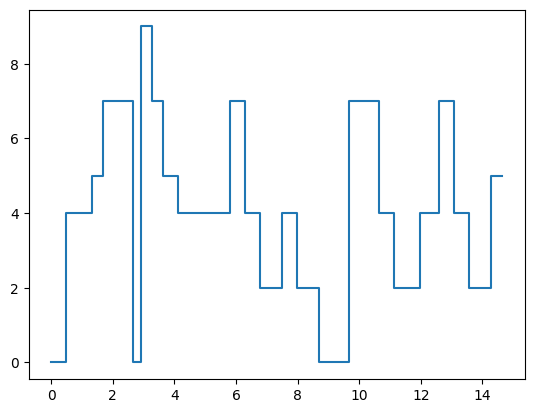

In [14]:
plt.plot(x[0,:,0], x[0,:,1])

In [23]:
a = torch.zeros(2,4)
b = torch.ones(2,4)
torch.stack((a,b), dim=2).view(2,8)

tensor([[0., 1., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 0., 1., 0., 1.]])

In [27]:
a = torch.arange(12).reshape(3,4)
b = torch.arange(12,24).reshape(3,4)
torch.stack((a,b), dim=2).view(3,8)

tensor([[ 0, 12,  1, 13,  2, 14,  3, 15],
        [ 4, 16,  5, 17,  6, 18,  7, 19],
        [ 8, 20,  9, 21, 10, 22, 11, 23]])

In [30]:
data = x.clone()
batch_size = data.shape[0]
seq_len = data.shape[1]
t = torch.zeros((batch_size, seq_len+1), dtype=data.dtype, device=data.device, requires_grad=False)
t[:,1:] = torch.cumsum(data[:,:,1], dim=1) # shape (batch_size, seq_len)
t[:,:-1] = t[:,:-1] + data[:,:,0] # add gap to time sequence to get correct start time

# Duration

(5.454543999999999, 290.18206)

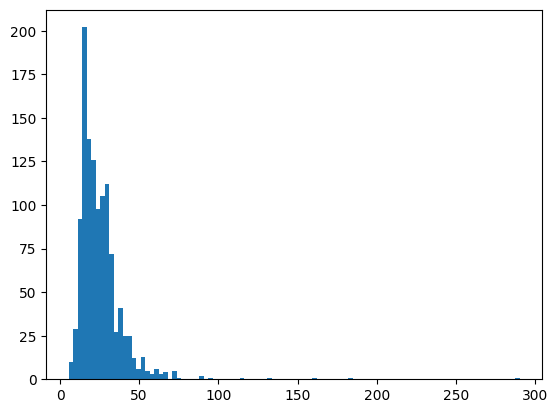

In [8]:
# Duration of melodies
durations = []
for df in dfs:
    durations.append(df['End'].max())
plt.hist(durations, bins=100);
min(durations), max(durations)

# Pitch range

In [9]:
# midi_note_df = pd.read_csv('./data/midi_to_notes.csv', index_col=0)
# dfs = [add_octave_and_note(df, midi_note_df) for df in dfs]

Min pitch: 34
Max pitch: 96


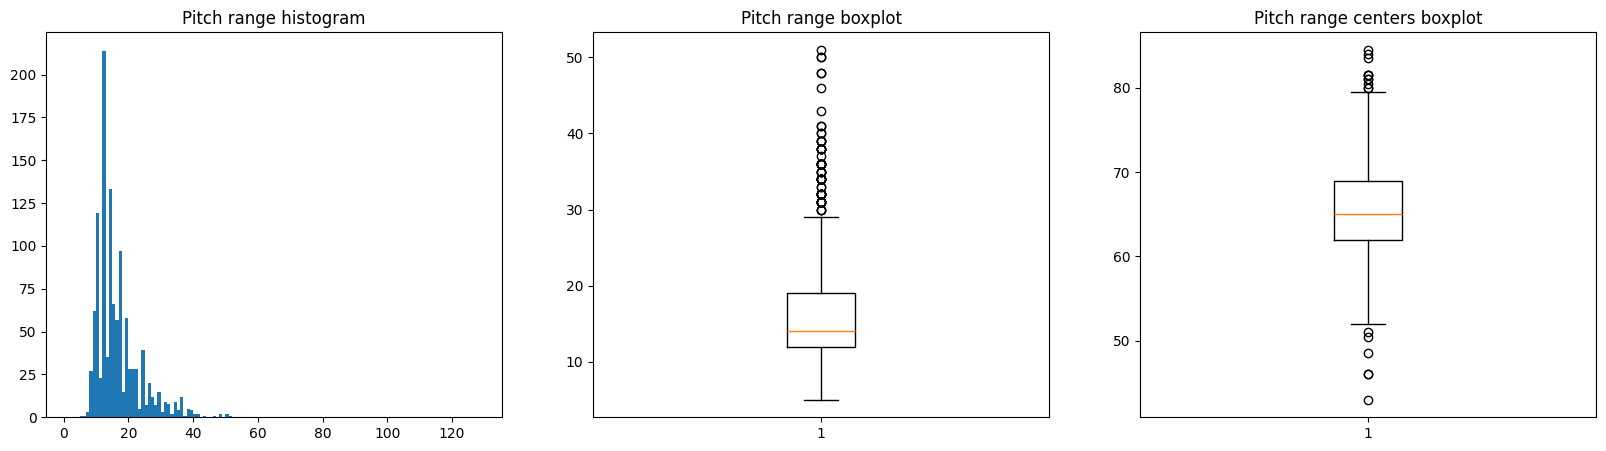

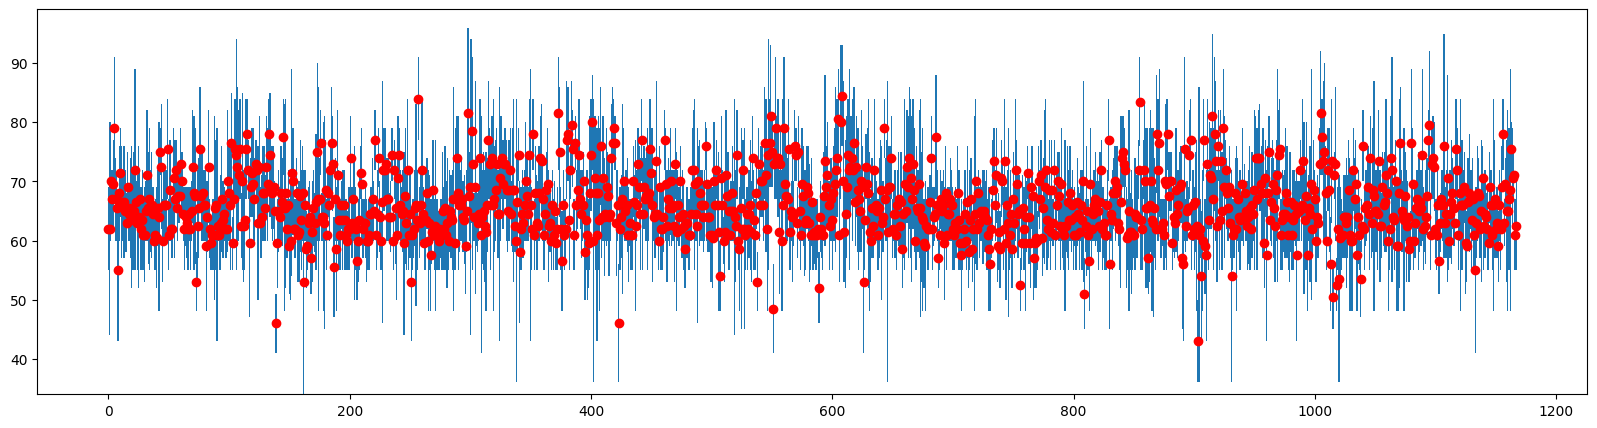

(34, 96)

In [10]:
pitch_range(dfs)

In [11]:
dfs2 = trim_by_range(dfs, min_range=5, max_range=24)

Min pitch: 36
Max pitch: 93


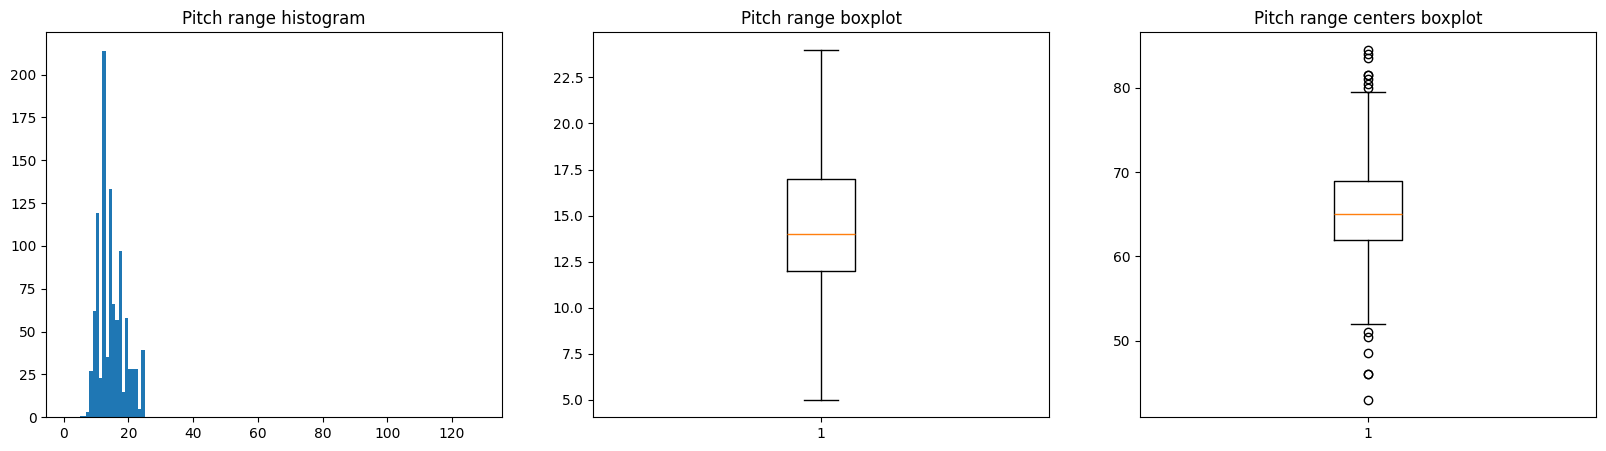

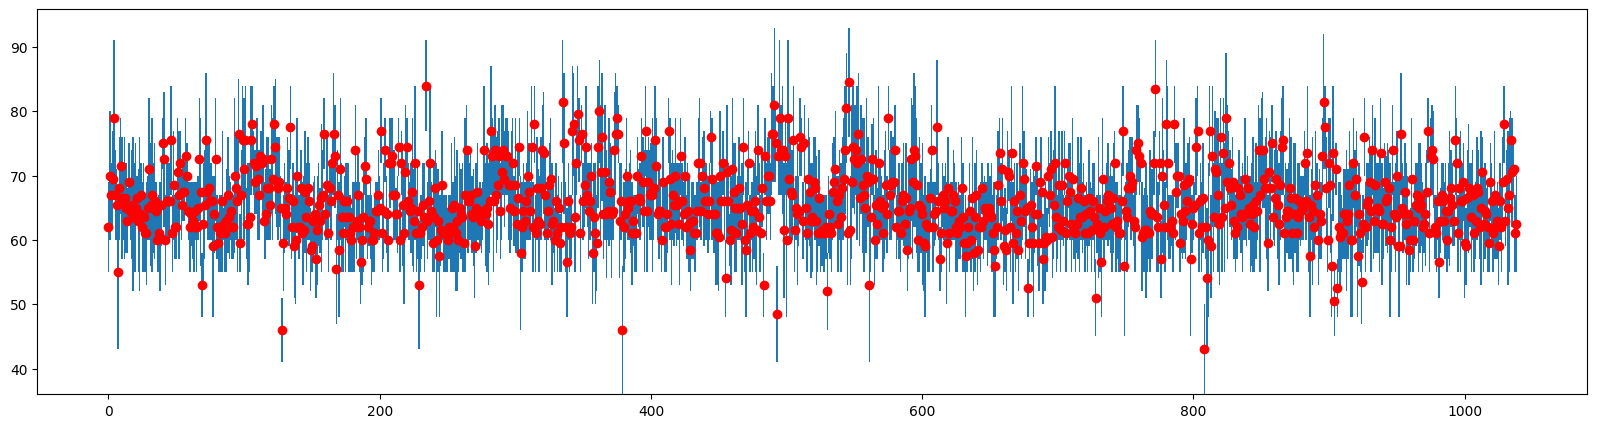

(36, 93)

In [12]:
pitch_range(dfs2)

In [13]:
# for df in dfs2:
#     center = (df['Pitch'].max() + df['Pitch'].min()) / 2
#     if center < 45:
#         display(df)
#         temp_df = df.copy()

In [14]:
# fig, ax = plt.subplots(figsize=(15, 5))
# plt.plot([0], [])

In [15]:
# dfs3 = move_octaves(dfs2, min_pitch=48, max_pitch=100)
# dfs3 = move_octaves(dfs3, min_pitch=48, max_pitch=80)
dfs3 = move_octaves(dfs2, center_range=[60, 72])

Min pitch: 48
Max pitch: 84


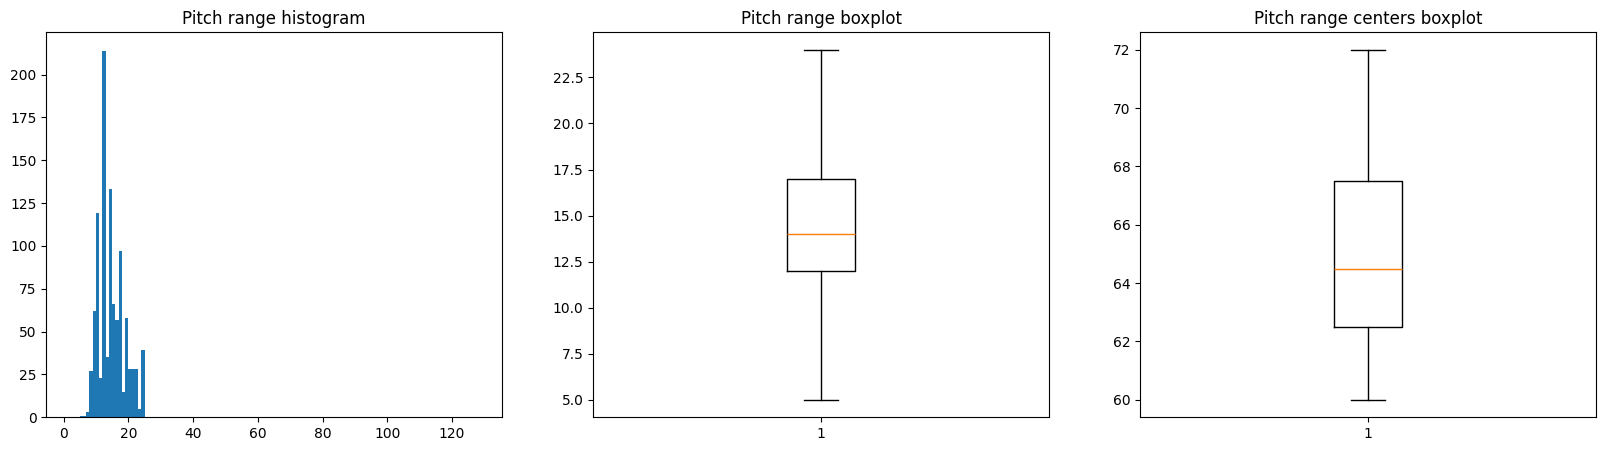

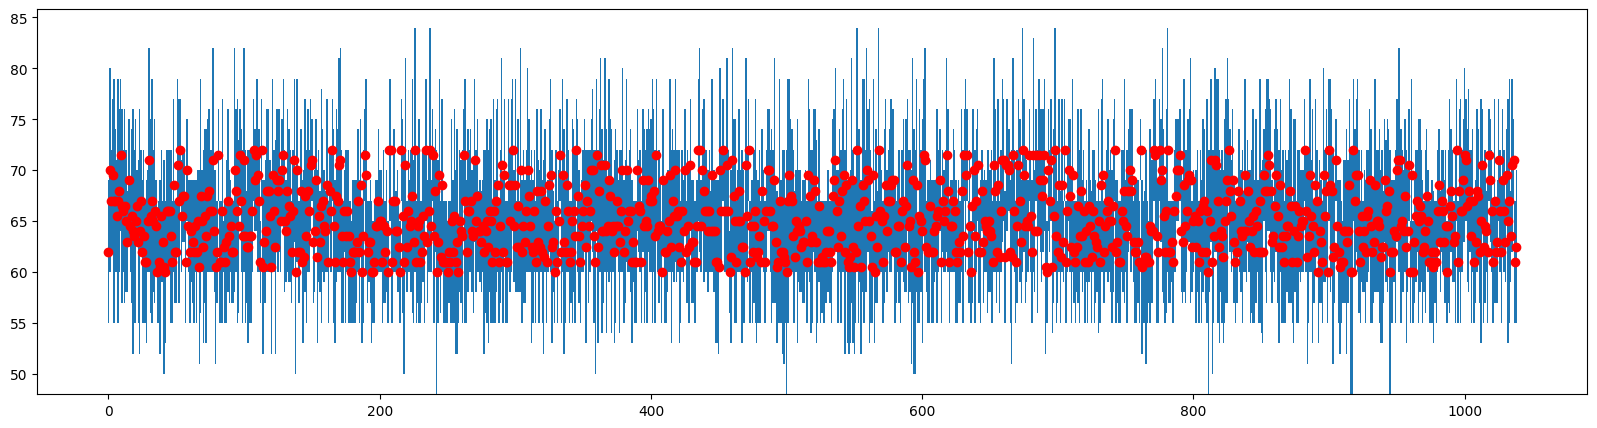

(48, 84)

In [16]:
pitch_range(dfs3)

In [17]:
with open(f'./data/dataframes/{key}/dfs_pitch_range_min_pitch_48_max_pitch_84.pkl', 'wb') as f:
    pickle.dump(dfs3, f)

# Octave translations

In [18]:
sample_idx = 400
dfs3[sample_idx]

Start       End  Pitch  Velocity Instrument
0   0.000000  0.099338     75        80     melody
1   0.099338  0.198676     68        80     melody
2   0.198676  0.298013     63        80     melody
3   0.298013  0.397351     74        80     melody
4   0.397351  0.496689     70        80     melody
..       ...       ...    ...       ...        ...
59  5.860927  5.960265     60        80     melody
60  5.960265  6.059603     69        80     melody
61  6.059603  6.158941     65        80     melody
62  6.158941  6.258278     71        80     melody
63  6.258278  6.357616     62        80     melody

[64 rows x 5 columns]

In [19]:
Fs = 44100
midi_data = df_to_midi(dfs[sample_idx])
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

In [20]:
df_octave_down = dfs[sample_idx].copy()
df_octave_down['Pitch'] = df_octave_down['Pitch'] - 12
midi_data = df_to_midi(df_octave_down)
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

# Gaps

In [21]:
# measure gap between start of next note and end of previous note
neg_gaps = []
pos_gaps = []
for df in dfs:
    gap = df['Start'].iloc[1:].values - df['End'].iloc[:-1].values
    if gap.min() < 0:
        neg_gaps.append(df)
    if gap.max() > 0:
        pos_gaps.append(df)
print(len(neg_gaps), len(pos_gaps))

0 894


# Duration + Pitch format

In [22]:
dfs4 = note_duration_transform(dfs3)

Min pitch: 49.0
Max pitch: 85.0


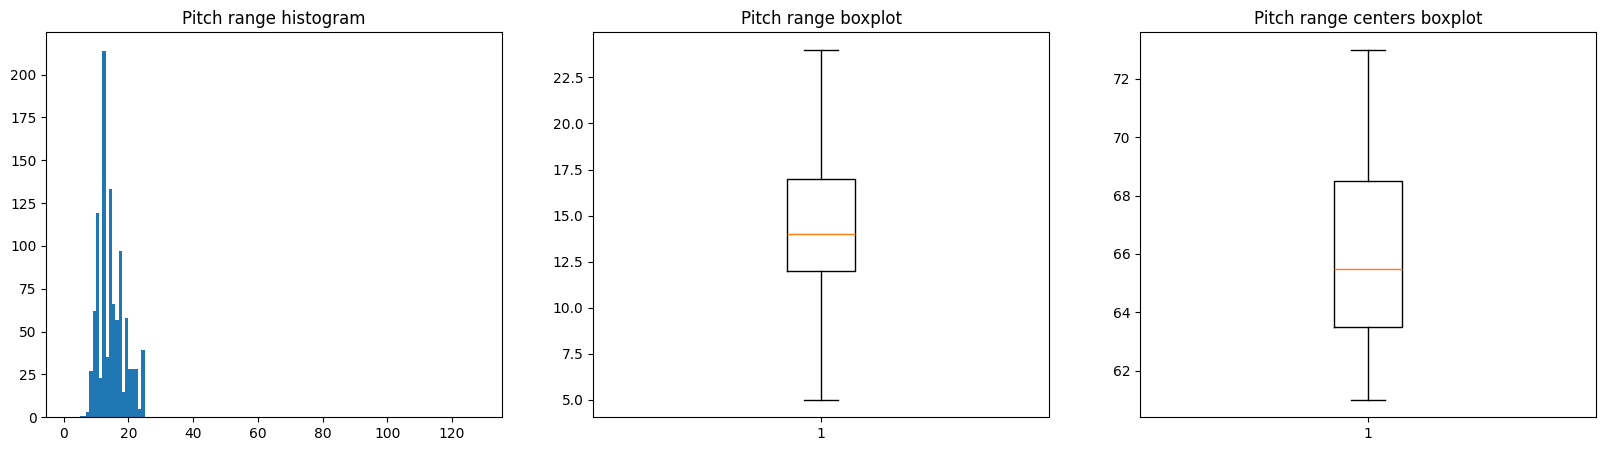

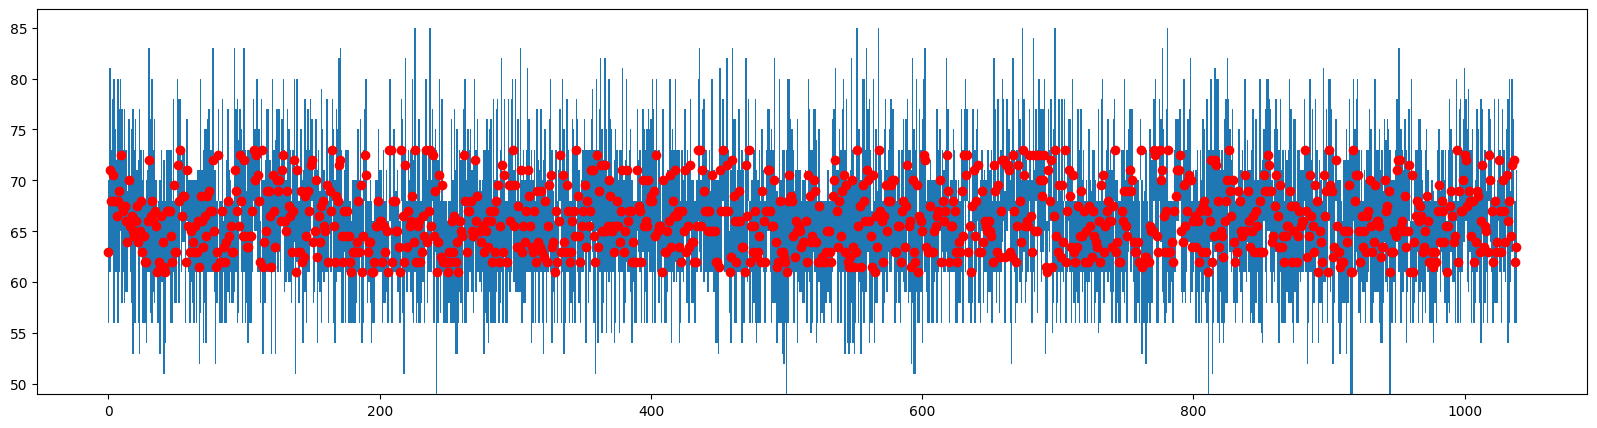

37.0

In [23]:
dfs5, max_pitch = pitch_translation(dfs4)
max_pitch

Min pitch: 1.0
Max pitch: 37.0


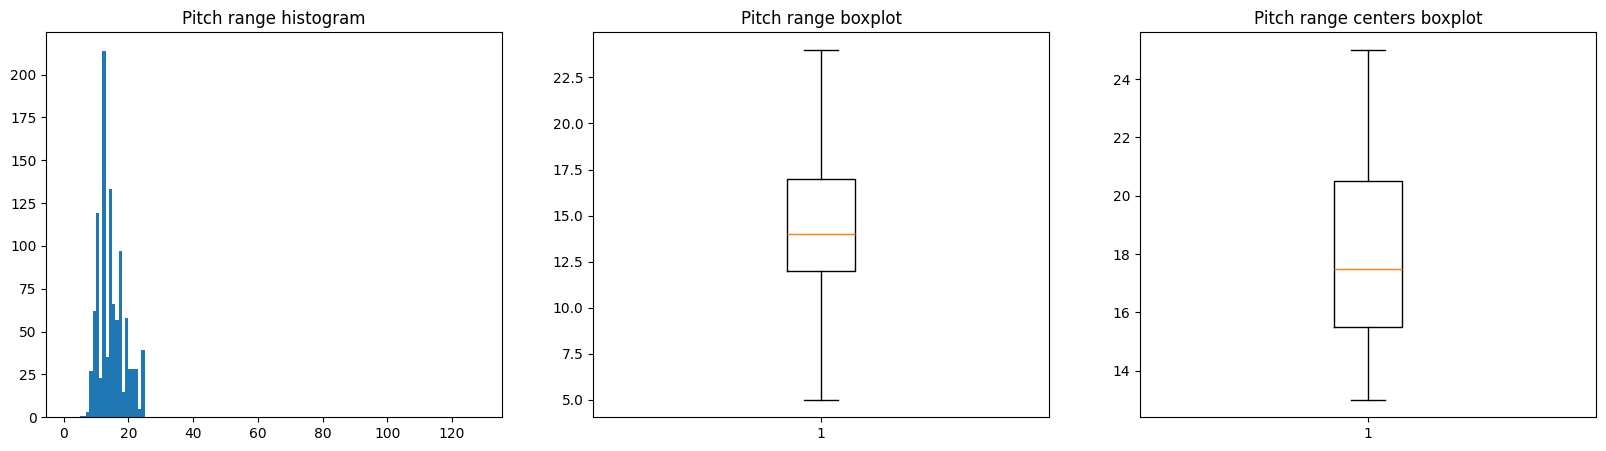

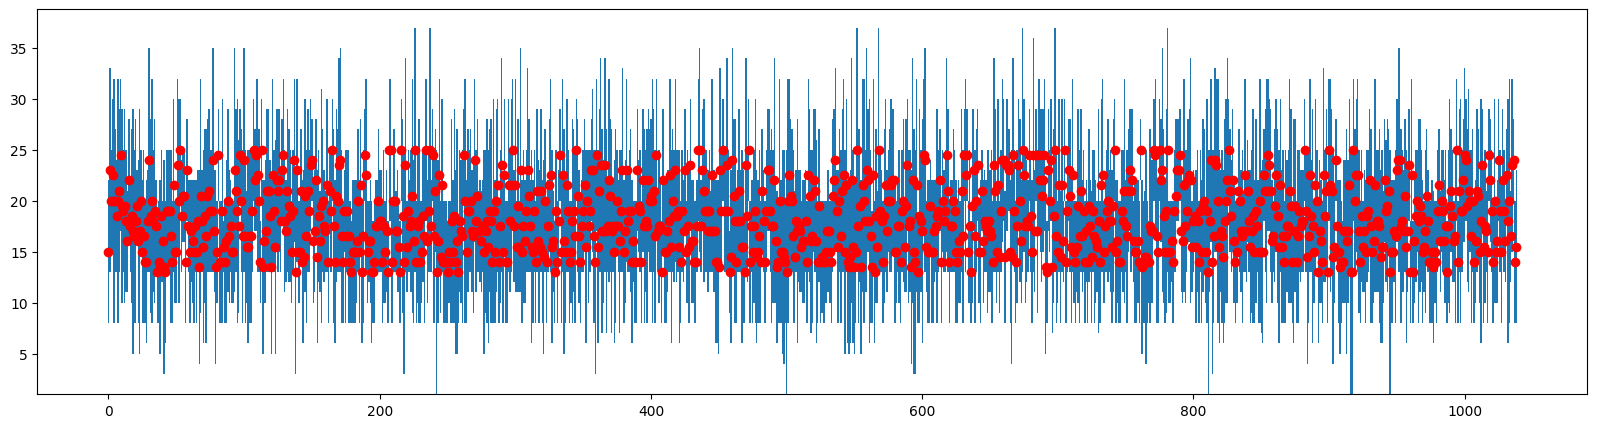

(1.0, 37.0)

In [24]:
pitch_range(dfs5)

In [25]:
with open(f'./data/dataframes/{key}/dfs_note_dur_offset_{int(max_pitch)}.pkl', 'wb') as f:
    pickle.dump(dfs5, f)

In [26]:
with open(f'./data/dataframes/{key}/dfs_note_dur_offset_{int(max_pitch)}.pkl', 'rb') as f:
    dfs5 = pickle.load(f)

In [29]:
dfs5[0]

Duration  Pitch
0   0.483871   13.0
1   0.483871   17.0
2   0.362903   17.0
3   0.362903   18.0
4   0.967742   20.0
..       ...    ...
62  0.725806   15.0
63  0.725807   13.0
64  0.725806   12.0
65  0.725806   10.0
66  0.483871   12.0

[67 rows x 2 columns]

In [27]:
dataset = NoteDurationDataset(dfs5, sample_len=20, scale=1., stride=10)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

UnboundLocalError: cannot access local variable 'df' where it is not associated with a value

In [ ]:
len(dataloader)

83